## Load geo data

This post shows hoow to build a choropleth map for US counties. County border coordinates have been found here and stored on github [here](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/counties-albers-10m.json). Let's load this data stored at `json` format with `geopandas`, and draw a map with it thanks to `geoplot`.

In [1]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
#geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/counties-albers-10m.json')
geoData = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')

#geoData = gpd.read_file('/Users/yan.holtz/Downloads/gz_2010_us_050_00_5m.json')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)



<AxesSubplot:>

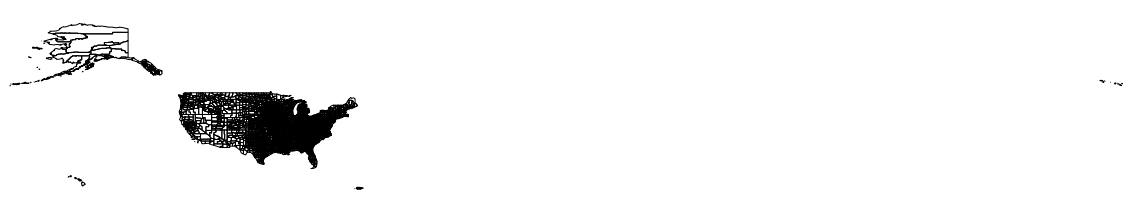

In [2]:
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

geoData["geometry"] = [MultiPolygon([feature]) if type(feature) == Polygon \
    else feature for feature in geoData["geometry"]]

gplt.polyplot(geoData, figsize=(20, 4) )

## Load numeric data

A choropleth map shows the distribution of a numeric variable on each items of a map. Let's consider the unemployment rate of each US county. Data comes from the Bureau of Labor Statistics, found [here](https://observablehq.com/@d3/choropleth) and stored here.

<AxesSubplot:xlabel='rate'>

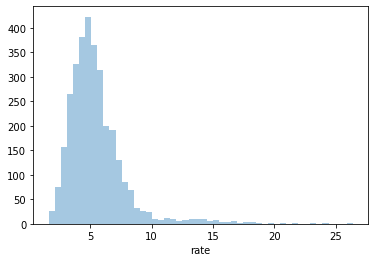

In [3]:
# library
import pandas as pd
import seaborn as sns

# Read file
data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/unemployment-x.csv')
data

# Show the distribution of unemployment rate
sns.distplot( data["rate"], hist=True, kde=False, rug=False )


## Merge spatial & numeric data


Both source of information need to be merged in order to be represented on the same figure. This can be done thanks to the

In [6]:
fullData = geoData.merge(data, left_on=['id'], right_on=['id'])


## Choropleth map with `GeoPlot`

<AxesSubplot:>

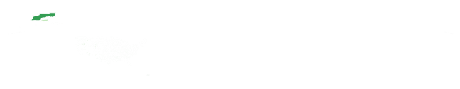

In [7]:
gplt.choropleth(fullData.tail(1000), 
    hue="rate", 
    cmap='Greens',
    edgecolor='white', 
    linewidth=1
)